In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import xarray as xr
import pygrib
import cartopy as cp

In [3]:
ds1 = xr.open_dataset('MRMS_data_2019_05_16/MRMS_MESH_00.50_20190516-180034.grib2')
ds2 = xr.open_dataset('MRMS_data_2019_05_16/MRMS_MergedReflectivityQCComposite_00.50_20190516-200038.grib2')
states_provinces = cp.feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',facecolor='none')

In [4]:
extent_data = [230,300,55,20]
extent_us_zoom = [230,300,49,20]
extent_midwest_zoom = [265,280,45,35]
states_provinces = cp.feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',facecolor='none')

In [15]:
mesh = ds1.unknown
ref = ds2.unknown
mesh.values = (mesh.values > 0)*mesh.values
ref.values = (ref.values > 0)*ref.values

Text(0.5, 1.0, 'MRMS MESH valid 20190516 2217 UTC ')

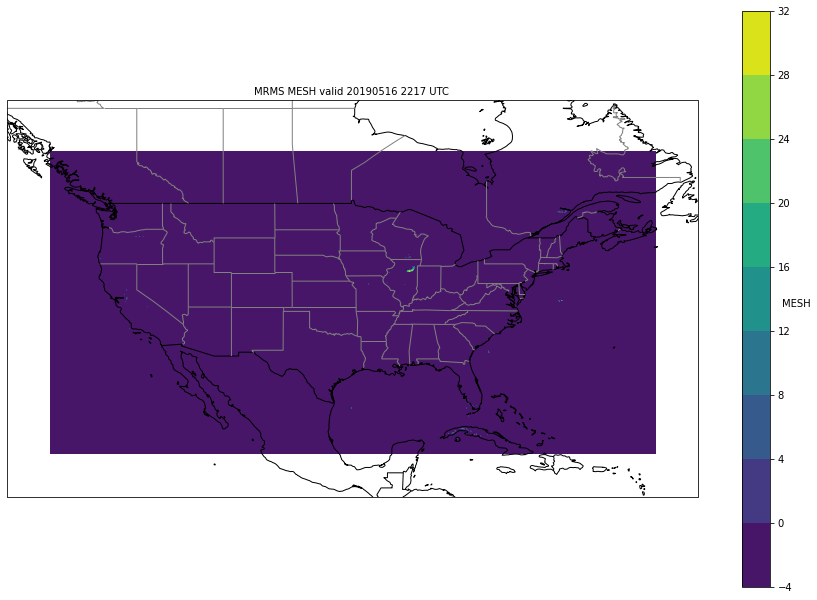

In [16]:
#set up the image
fig = plt.figure()
fig.set_size_inches(12,8)
#Specify that we're plotting on US map
ax=plt.axes([0.,0.,1.,1.],projection=ccrs.PlateCarree())
#Show this region of the map
ax.set_extent([-135.0,-55.0,54.0,15.0])

#The following lines do the same thing
plot = ax.contourf(mesh.values,extent=[230.0,300.0,55.0,20.0],transform=ccrs.PlateCarree())
#plot = ax.contourf(mesh.longitude.values,mesh.latitude.values,mesh.values,transform=ccrs.PlateCarree())

#Show map features
ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
#Add color bar
colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('MESH',rotation='horizontal',fontsize='medium')
#Add title
titlestr = 'MRMS MESH valid 20190516 1800 UTC '
plt.title(titlestr, fontsize='medium')

Text(0.5, 1.0, 'MRMS MESH valid 20190516 1800 UTC ')

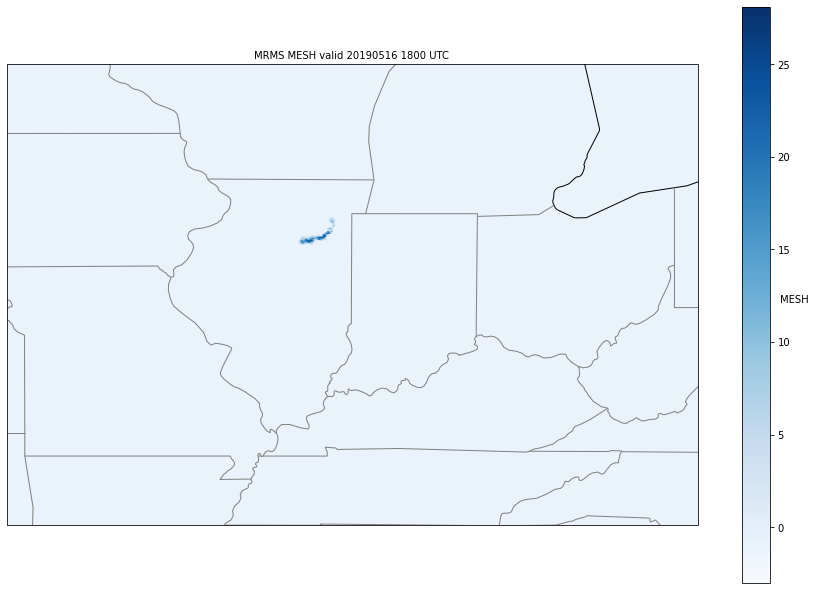

In [12]:
#set up the image
fig = plt.figure()
fig.set_size_inches(12,8)
#Specify that we're plotting on US map
ax=plt.axes([0.,0.,1.,1.],projection=ccrs.PlateCarree())
#Show this region of the map
ax.set_extent([265-360,280-360,45,35])

#The following lines do the same thing
#plot = ax.pcolormesh(mesh.values,extent=[230.0,300.0,55.0,20.0],transform=ccrs.PlateCarree())
plot = ax.pcolormesh(mesh.longitude.values,mesh.latitude.values,mesh.values,transform=ccrs.PlateCarree(),cmap="Blues")

#Show map features
ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
#Add color bar
colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('MESH',rotation='horizontal',fontsize='medium')
#Add title
titlestr = 'MRMS MESH valid 20190516 1800 UTC '
plt.title(titlestr, fontsize='medium')

Text(0.5, 1.0, 'MRMS Reflectivity valid 20190516 1800 UTC ')

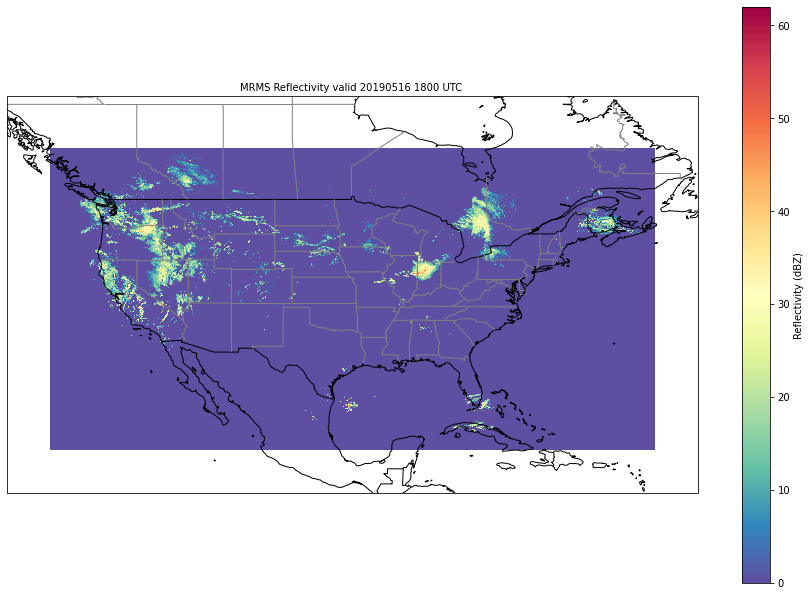

In [16]:
#set up the image
fig = plt.figure()
fig.set_size_inches(12,8)
#Specify that we're plotting on US map
ax=plt.axes([0.,0.,1.,1.],projection=ccrs.PlateCarree())
#Show this region of the map
ax.set_extent([-135.0,-55.0,54.0,15.0])

#The following lines do the same thing
#plot = ax.contourf((ref.values > 0)*ref.values,extent=[230.0,300.0,55.0,20.0],transform=ccrs.PlateCarree())
plot = ax.pcolormesh(ref.longitude.values,ref.latitude.values,ref.values,transform=ccrs.PlateCarree(),cmap="Spectral_r")

#Show map features
ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
#Add color bar
colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('Reflectivity (dBZ)',rotation='vertical',fontsize='medium')
#Add title
titlestr = 'MRMS Reflectivity valid 20190516 1800 UTC '
plt.title(titlestr, fontsize='medium')

In [5]:
import glob
files = glob.glob("MRMS_data_2019_05_16/MRMS_Merged*-200*.grib2")
files.sort()

file_list = []
for file in files:
     file_list.append(xr.open_dataset(file))
ds = xr.concat(file_list, dim="valid_time")
refc = ds.unknown

Ignoring index file 'MRMS_data_2019_05_16\\MRMS_MergedReflectivityQCComposite_00.50_20190516-200038.grib2.923a8.idx' incompatible with GRIB file


In [6]:
refc

<xarray.DataArray 'unknown' (valid_time: 5, latitude: 3500, longitude: 7000)>
array([[[-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        ...,
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.]],

       [[-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        ...,
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.]],

       [[-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        ...,
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.]],

       [[-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        ...,
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.]],

       [[-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        ...,
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.],
        [-999., -999., -999., ..., -999., -999., -999.]]], dtype=float32)
Coordinates:
    time            (valid_time) datetime64[ns] 2019-05-16T20:00:00 ... 2019-...
    step            timedelta64[ns] 00:00:00
    heightAboveSea  float64 500.0
  * latitude        (latitude) float64 54.99 54.98 54.98 ... 20.03 20.02 20.01
  * longitude       (longitude) float64 230.0 230.0 230.0 ... 300.0 300.0 300.0
  * valid_time      (valid_time) datetime64[ns] 2019-05-16T20:00:00 ... 2019-...
Attributes: (12/29)
    GRIB_paramId:                             0
    GRIB_dataType:                            ra
    GRIB_numberOfPoints:                      24500000
    GRIB_typeOfLevel:                         heightAboveSea
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                unknown
    GRIB_shortName:                           unknown
    GRIB_units:                               unknown
    long_name:                                unknown
    units:                                    unknown
    standard_name:                            unknown

In [71]:
refc.values = (refc.values > 0)*refc.values
refc_max_bool = refc.coarsen(valid_time=5).max()>0
refc_mean_bool = refc.coarsen(valid_time=5).mean()>0

In [72]:
equal_bool = refc_max_bool.isel(valid_time=0).values != refc_mean_bool.isel(valid_time=0).values
equal_mean = refc_mean.isel(valid_time=0).values != refc_sum_mean.isel(valid_time=0).values

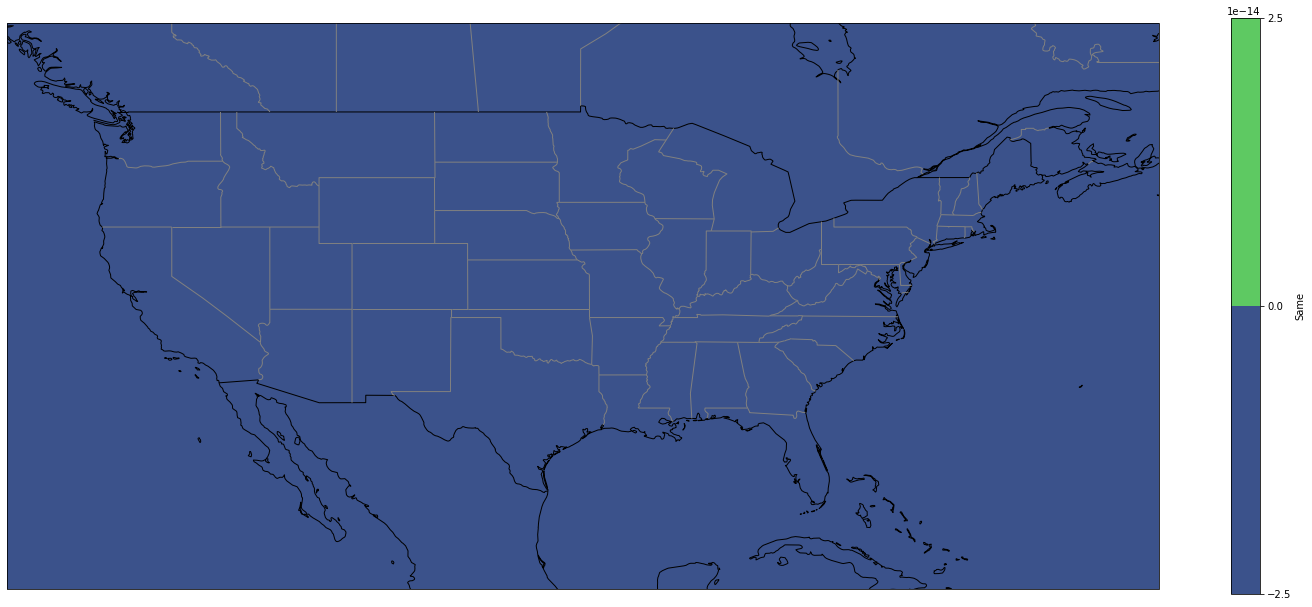

In [73]:
fig = plt.figure()
fig.set_size_inches(20,8)
ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
ax.set_extent(extent_us_zoom)

plot = ax.contourf(refc_max_bool.longitude, refc_max_bool.latitude, equal_bool, transform=ccrs.PlateCarree())

colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('Same',rotation='vertical',fontsize='medium')


In [54]:
print(equal_bool[1700:2100:50,4000:4500:50])

[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]


In [52]:
print(equal_bool.shape)

(3500, 7000)


In [65]:
[230,300,55,20]
count = 0
for i in range(4000,5000):
    for j in range(1700,2200):
        if(equal_bool[j,i] == True):
            count = count + 1
            print('i = ' + str(i) + ', j = ' + str(j))
            mean_val = (refc.coarsen(valid_time=5).mean()).isel(latitude=j,longitude=i).values
            max_val = (refc.coarsen(valid_time=5).max()).isel(latitude=j,longitude=i).values
            vals = refc.isel(latitude=j,longitude=i).values
            break
print(count)

i = 4000, j = 1828
i = 4001, j = 1828
i = 4002, j = 1828
i = 4003, j = 1828
i = 4004, j = 1828


KeyboardInterrupt: 

In [66]:
print(j)
print(i)
print(mean_val)
print(max_val)
print(vals)

1828
4004
[-76.5]
[13.5]
[ 13.5 -99.  -99.  -99.  -99. ]


In [70]:
refc.isel(latitude=slice(1820,1830),longitude=slice(4000,4010)).values

array([[[-99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. ,
         -99. ],
        [-99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. ,
         -99. ],
        [-99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. ,
         -99. ],
        [-99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. ,
         -99. ],
        [-99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. ,
         -99. ],
        [-99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. ,
         -99. ],
        [-99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. ,
         -99. ],
        [-99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. ,
         -99. ],
        [ 10. ,  11. ,  13.5,  13.5,   5. , -99. , -99. , -99. , -99. ,
         -99. ],
        [ 24. ,  28.5,  23. ,  23. ,  15.5,   3.5,   3.5, -99. , -99. ,
         -99. ]],

       [[-99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. , -99. ,
         -99. ],
        [-99. , -99

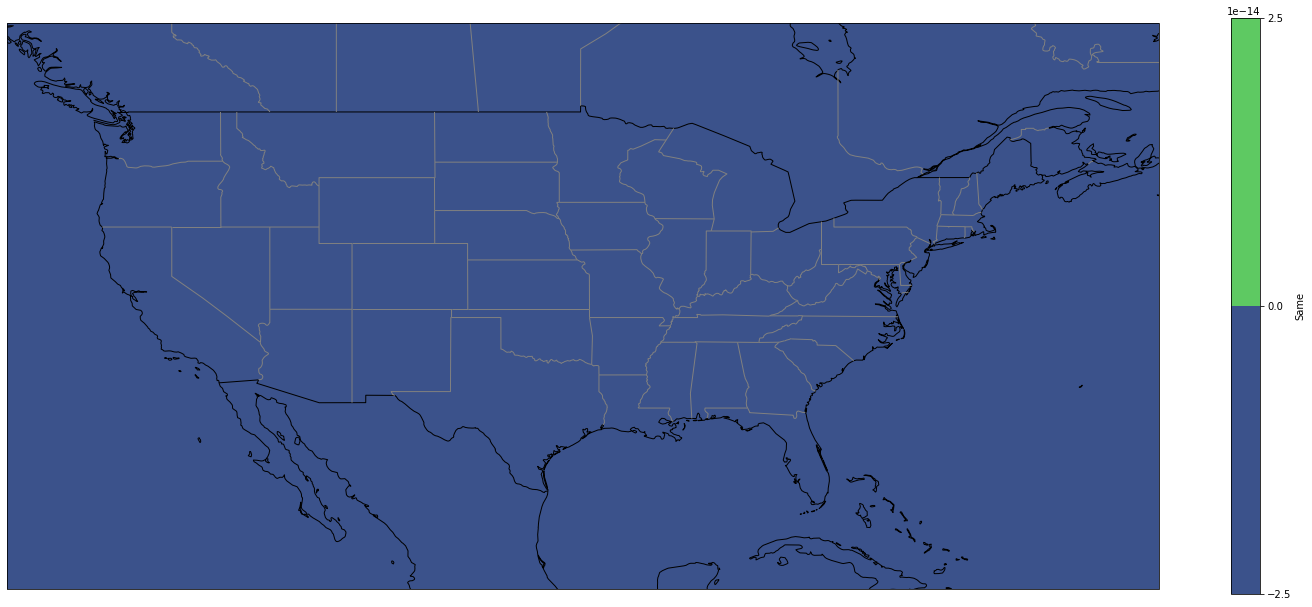

In [14]:
fig = plt.figure()
fig.set_size_inches(20,8)
ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
ax.set_extent(extent_us_zoom)

plot = ax.contourf(refc_max_bool.longitude, refc_max_bool.latitude, equal_mean, transform=ccrs.PlateCarree())

colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('Same',rotation='vertical',fontsize='medium')


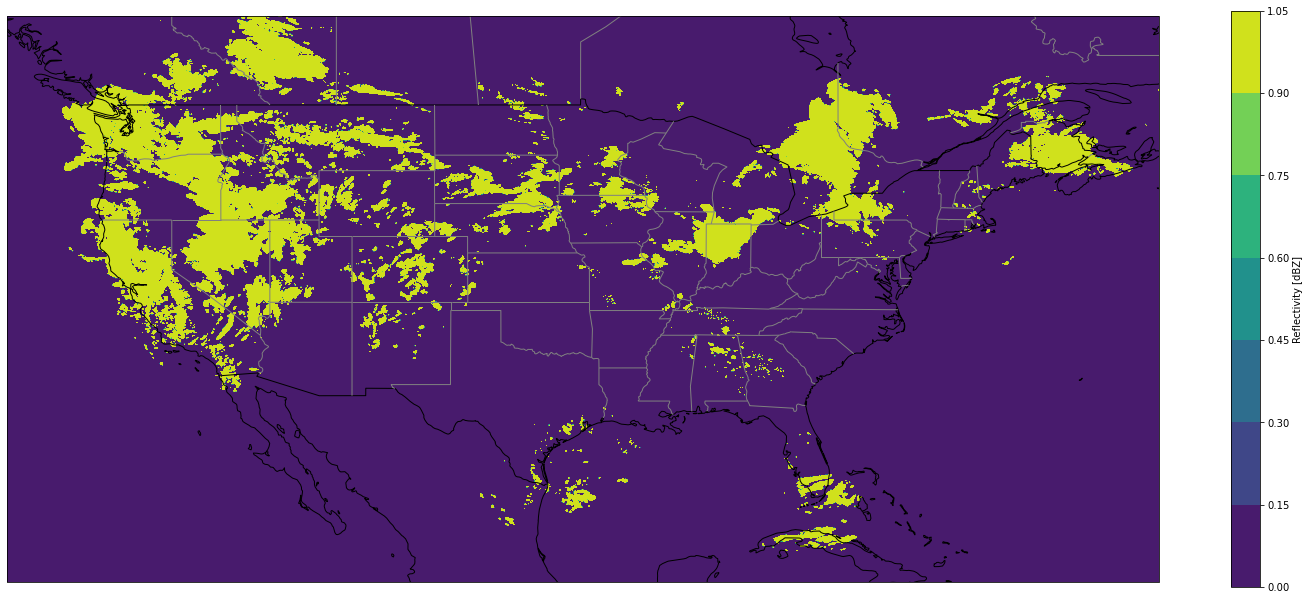

In [12]:
fig = plt.figure()
fig.set_size_inches(20,8)
ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
ax.set_extent(extent_us_zoom)

plot = ax.contourf(refc_max_bool.isel(valid_time=0),
                   extent=extent_data,
                   transform=ccrs.PlateCarree())

colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('Reflectivity [dBZ]',rotation='vertical',fontsize='medium')
            

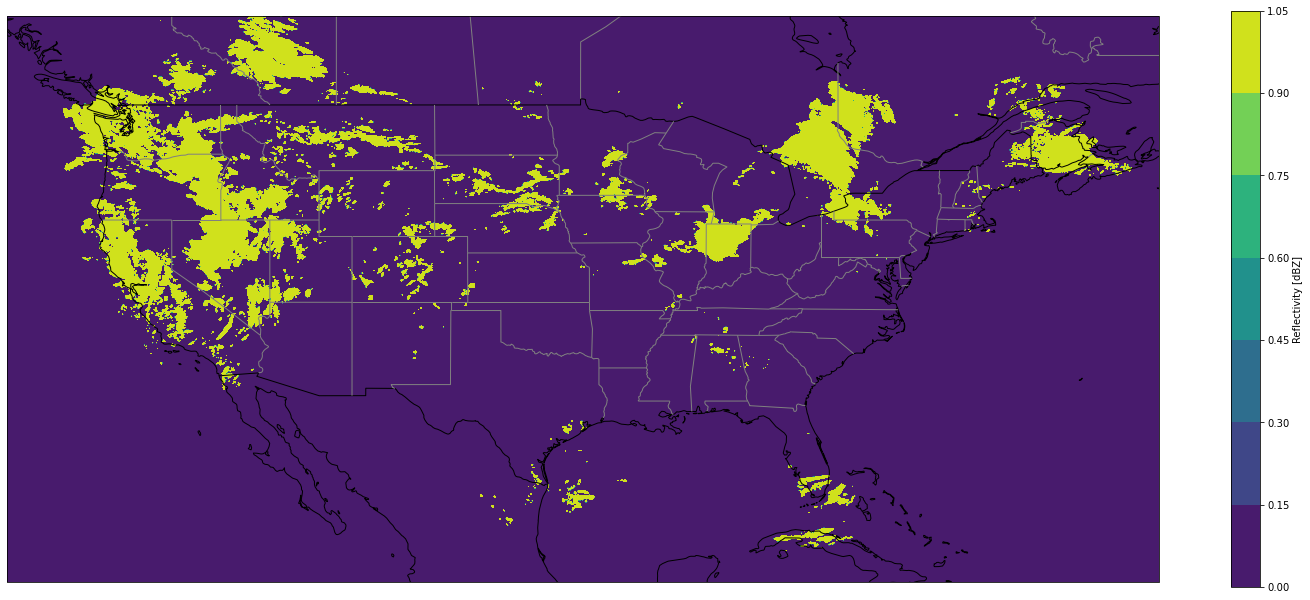

In [13]:
fig = plt.figure()
fig.set_size_inches(20,8)
ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
ax.set_extent(extent_us_zoom)

plot = ax.contourf(refc_mean_bool.isel(valid_time=0),
                   extent=extent_data,
                   transform=ccrs.PlateCarree())

colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('Reflectivity [dBZ]',rotation='vertical',fontsize='medium')
  

In [4]:
import glob
files = glob.glob("MRMS_data_2019_05_16/MRMS_MESH*-20*.grib2")
files.sort()
file_list = []
for file in files:
     file_list.append(xr.open_dataset(file))
ds = xr.concat(file_list, dim="valid_time")

In [13]:
p90 = ds.unknown.coarsen(valid_time=5)

In [15]:
p90?

Type:            DataArrayCoarsen
String form:     DataArrayCoarsen [windows->{'valid_time': 5},side->left]
File:            c:\users\lkspy\anaconda3\envs\hagelslag\lib\site-packages\xarray\core\rolling.py
Docstring:       <no docstring>
Class docstring:
A object that implements the coarsen.

See Also
--------
Dataset.coarsen
DataArray.coarsen
Init docstring: 
Moving window object.

Parameters
----------
obj : Dataset or DataArray
    Object to window.
windows : mapping of hashable to int
    A mapping from the name of the dimension to create the rolling
    exponential window along (e.g. `time`) to the size of the moving window.
boundary : 'exact' | 'trim' | 'pad'
    If 'exact', a ValueError will be raised if dimension size is not a
    multiple of window size. If 'trim', the excess indexes are trimed.
    If 'pad', NA will be padded.
side : 'left' or 'right' or mapping from dimension to 'left' or 'right'
coord_func : mapping from coordinate name to func.

Returns
-------
coarsen


In [ ]:
ds = xr.concat(file_list, dim="valid_time")

In [ ]:
p90.to_netcdf("unet_test_data/MRMS_MESH_90th_2000_2100_10min.nc")